<a href="https://colab.research.google.com/github/A00797571/Econometria-Financiera/blob/main/Examen_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


--- Processing GDP ---


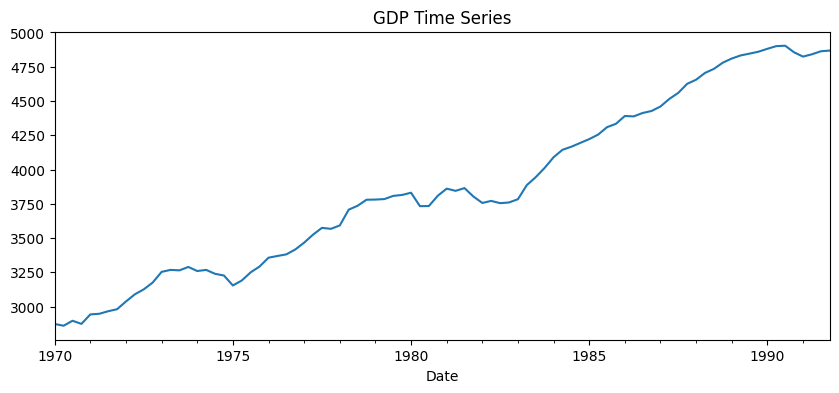

ADF Statistic: 0.7317376139820075
p-value: 0.9904504250241283
Series is not stationary


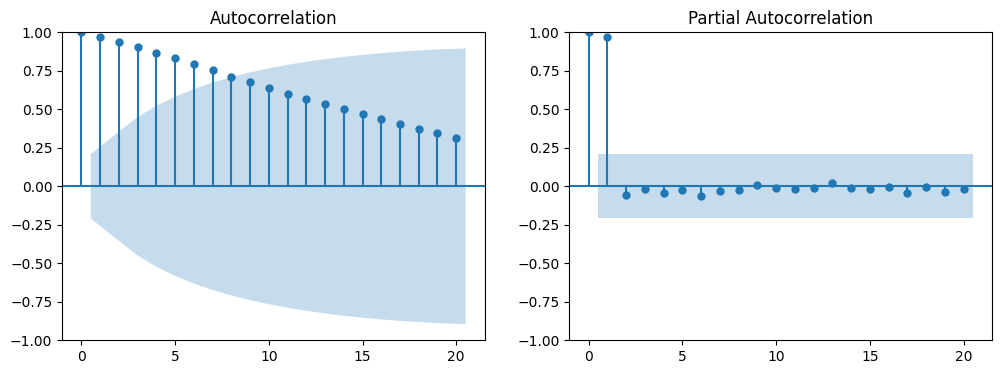

Best ARIMA order for GDP: (1, 2, 1) with AIC: 860.5653395807783
                               SARIMAX Results                                
Dep. Variable:                    GDP   No. Observations:                   88
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -427.283
Date:                Sat, 01 Nov 2025   AIC                            860.565
Time:                        22:32:10   BIC                            867.928
Sample:                    01-01-1970   HQIC                           863.529
                         - 10-01-1991                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3316      0.127      2.613      0.009       0.083       0.580
ma.L1         -0.9994      2.934     -0.341      0.733      -6.749 

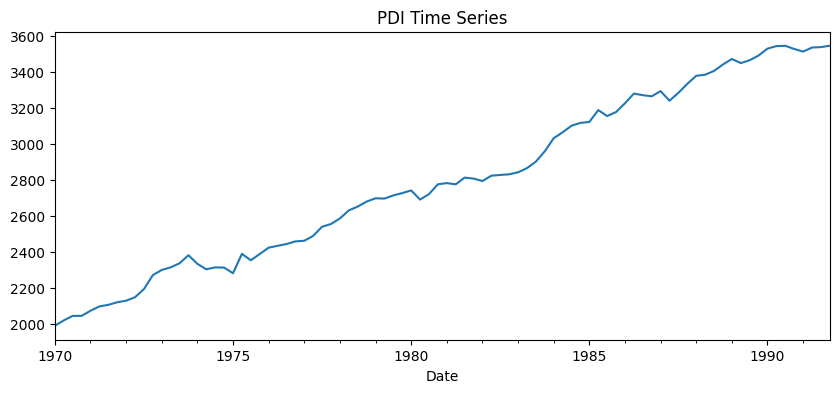

ADF Statistic: -0.6715760764960405
p-value: 0.8539752558788607
Series is not stationary


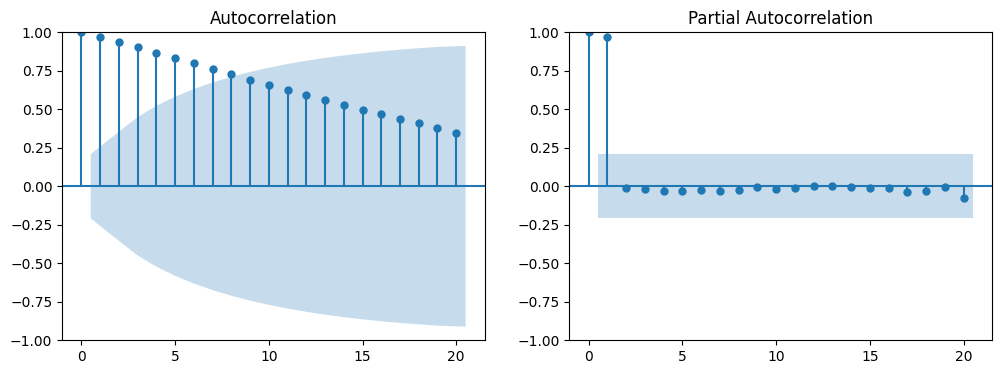

Best ARIMA order for PDI: (0, 2, 1) with AIC: 825.2688944572335
                               SARIMAX Results                                
Dep. Variable:                    PDI   No. Observations:                   88
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -410.634
Date:                Sat, 01 Nov 2025   AIC                            825.269
Time:                        22:32:16   BIC                            830.178
Sample:                    01-01-1970   HQIC                           827.244
                         - 10-01-1991                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9995      4.159     -0.240      0.810      -9.150       7.151
sigma2       780.2962   3257.813      0.240      0.811   -5604.899 

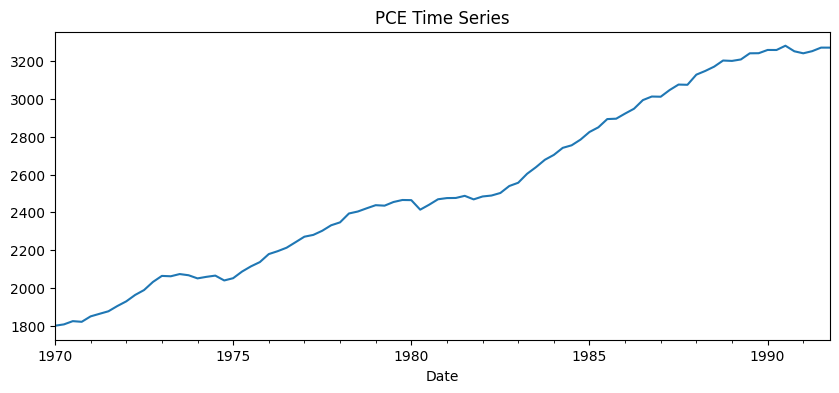

ADF Statistic: -0.718221249465323
p-value: 0.8419732025169981
Series is not stationary


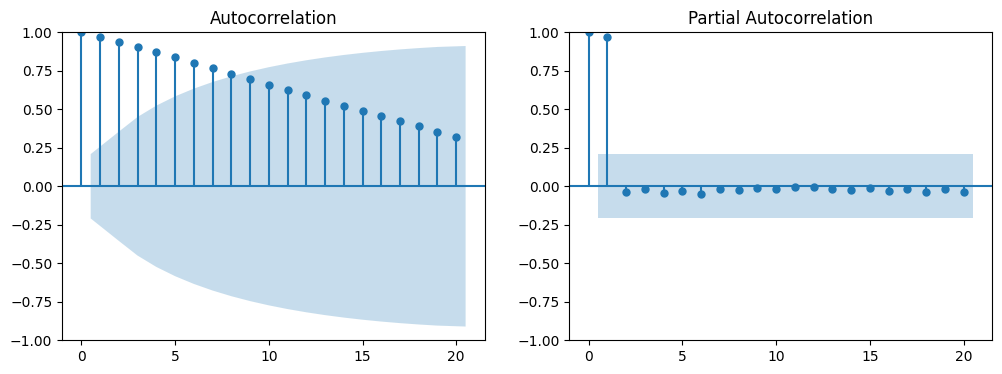

Best ARIMA order for PCE: (0, 2, 1) with AIC: 748.0673327684265
                               SARIMAX Results                                
Dep. Variable:                    PCE   No. Observations:                   88
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -372.034
Date:                Sat, 01 Nov 2025   AIC                            748.067
Time:                        22:32:19   BIC                            752.976
Sample:                    01-01-1970   HQIC                           750.043
                         - 10-01-1991                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7698      0.070    -11.054      0.000      -0.906      -0.633
sigma2       331.5972     46.394      7.147      0.000     240.667 

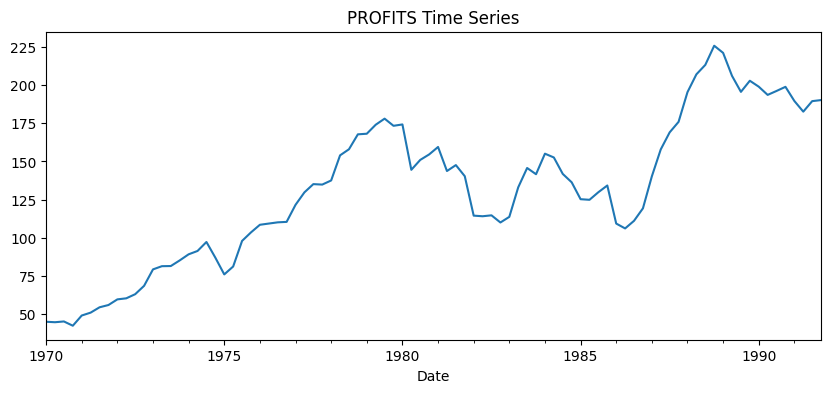

ADF Statistic: -1.384436193042824
p-value: 0.5897144423746461
Series is not stationary


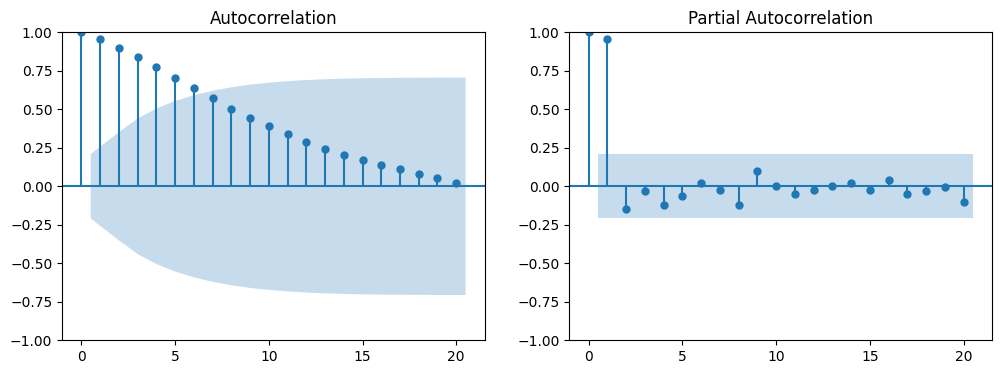

Best ARIMA order for PROFITS: (1, 2, 1) with AIC: 630.9766224695013
                               SARIMAX Results                                
Dep. Variable:                PROFITS   No. Observations:                   88
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -312.488
Date:                Sat, 01 Nov 2025   AIC                            630.977
Time:                        22:32:22   BIC                            638.340
Sample:                    01-01-1970   HQIC                           633.940
                         - 10-01-1991                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2797      0.112      2.503      0.012       0.061       0.499
ma.L1         -0.9993      1.617     -0.618      0.537      -4.

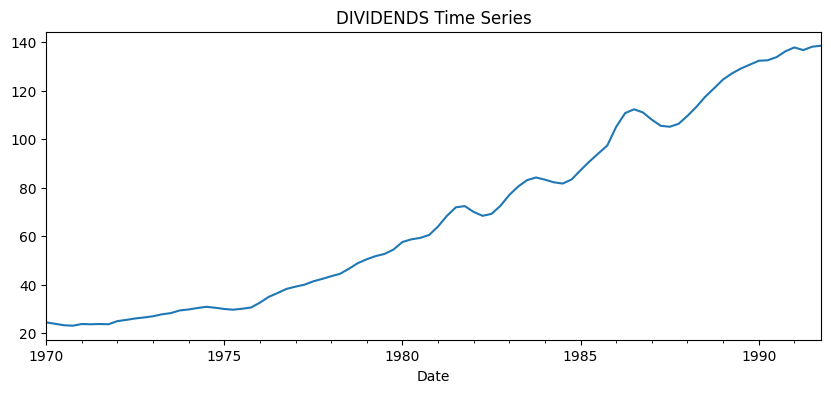

ADF Statistic: 1.070646114291247
p-value: 0.9949581463476356
Series is not stationary


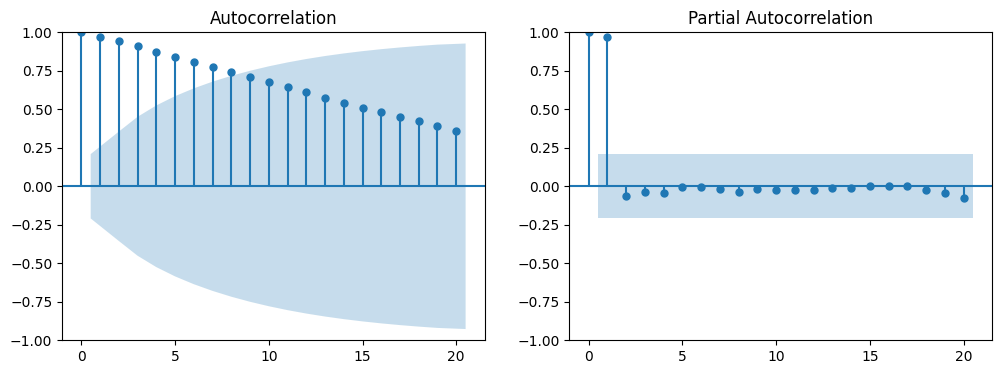

Best ARIMA order for DIVIDENDS: (2, 2, 2) with AIC: 269.8839748774851
                               SARIMAX Results                                
Dep. Variable:              DIVIDENDS   No. Observations:                   88
Model:                 ARIMA(2, 2, 2)   Log Likelihood                -129.942
Date:                Sat, 01 Nov 2025   AIC                            269.884
Time:                        22:32:27   BIC                            282.156
Sample:                    01-01-1970   HQIC                           274.823
                         - 10-01-1991                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5294      0.125     12.211      0.000       1.284       1.775
ar.L2         -0.8098      0.099     -8.168      0.000      -

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools
import warnings
warnings.filterwarnings('ignore')

# The data as a multi-line string
data_str = """
YEAR      GDP       PDI       PCE     PROFITS   DIVIDENDS
1970.1    2872.8    1990.6    1800.5     44.7      24.5
1970.2    2860.3    2020.1    1807.5     44.4      23.9
1970.3    2896.6    2045.3    1824.7     44.9      23.3
1970.4    2873.7    2045.2    1821.2     42.1      23.1
1971.1    2942.9    2073.9    1849.9     48.8      23.8
1971.2    2947.4    2098.0    1863.5     50.7      23.7
1971.3    2966.0    2106.6    1876.9     54.2      23.8
1971.4    2980.8    2121.1    1904.6     55.7      23.7
1972.1    3037.3    2129.7    1929.3     59.4      25.0
1972.2    3089.7    2149.1    1963.3     60.1      25.5
1972.3    3125.8    2193.9    1989.1     62.8      26.1
1972.4    3175.5    2272.0    2032.1     68.3      26.5
1973.1    3253.3    2300.7    2063.9     79.1      27.0
1973.2    3267.6    2315.2    2062.0     81.2      27.8
1973.3    3264.3    2337.9    2073.7     81.3      28.3
1973.4    3289.1    2382.7    2067.4     85.0      29.4
1974.1    3259.4    2334.7    2050.8     89.0      29.8
1974.2    3267.6    2304.5    2059.0     91.2      30.4
1974.3    3239.1    2315.0    2065.5     97.1      30.9
1974.4    3226.4    2313.7    2039.9     86.8      30.5
1975.1    3154.0    2282.5    2051.8     75.8      30.0
1975.2    3190.4    2390.3    2086.9     81.0      29.7
1975.3    3249.9    2354.4    2114.4     97.8      30.1
1975.4    3292.5    2389.4    2137.0    103.4      30.6
1976.1    3356.7    2424.5    2179.3    108.4      32.6
1976.2    3369.2    2434.9    2194.7    109.2      35.0
1976.3    3381.0    2444.7    2213.0    110.0      36.6
1976.4    3416.3    2459.5    2242.0    110.3      38.3
1977.1    3466.4    2463.0    2271.3    121.5      39.2
1977.2    3525.0    2490.3    2280.8    129.7      40.0
1977.3    3574.4    2541.0    2302.6    135.1      41.4
1977.4    3567.2    2556.2    2331.6    134.8      42.4
1978.1    3591.8    2587.3    2347.1    137.5      43.5
1978.2    3707.0    2631.9    2394.0    154.0      44.5
1978.3    3735.6    2653.2    2404.5    158.0      46.6
1978.4    3779.6    2680.9    2421.6    167.8      48.9
1979.1    3780.8    2699.2    2437.9    168.2      50.5
1979.2    3784.3    2697.6    2435.4    174.1      51.8
1979.3    3807.5    2715.3    2454.7    178.1      52.7
1979.4    3814.6    2728.1    2465.4    173.4      54.5
1980.1    3830.8    2742.9    2464.6    174.3      57.6
1980.2    3732.6    2692.0    2414.2    144.5      58.7
1980.3    3733.5    2722.5    2440.3    151.0      59.3
1980.4    3808.5    2777.0    2469.2    154.6      60.5
1981.1    3860.5    2783.7    2475.5    159.5      64.0
1981.2    3844.4    2776.7    2476.1    143.7      68.4
1981.3    3864.5    2814.1    2487.4    147.6      71.9
1981.4    3803.1    2808.8    2468.6    140.3      72.4
1982.1    3756.1    2795.0    2484.0    114.4      70.0
1982.2    3771.1    2824.8    2488.9    114.0      68.4
1982.3    3754.4    2829.0    2502.5    114.6      69.2
1982.4    3759.6    2832.6    2539.3    109.9      72.5
1983.1    3783.5    2843.6    2556.5    113.6      77.0
1983.2    3886.5    2867.0    2604.0    133.0      80.5
1983.3    3944.4    2903.0    2639.0    145.7      83.1
1983.4    4012.1    2960.6    2678.2    141.6      84.2
1984.1    4089.5    3033.2    2703.8    155.1      83.3
1984.2    4144.0    3065.9    2741.1    152.6      82.2
1984.3    4166.4    3102.7    2754.6    141.8      81.7
1984.4    4194.2    3118.5    2784.8    136.3      83.4
1985.1    4221.8    3123.6    2824.9    125.2      87.2
1985.2    4254.8    3189.6    2849.7    124.8      90.8
1985.3    4309.0    3156.5    2893.3    129.8      94.1
1985.4    4333.5    3178.7    2895.3    134.2      97.4
1986.1    4390.5    3227.5    2922.4    109.2     105.1
1986.2    4387.7    3281.4    2947.9    106.0     110.7
1986.3    4412.6    3272.6    2993.7    111.0     112.3
1986.4    4427.1    3266.2    3012.5    119.2     111.0
1987.1    4460.0    3295.2    3011.5    140.2     108.0
1987.2    4515.3    3241.7    3046.8    157.9     105.5
1987.3    4559.3    3285.7    3075.8    169.1     105.1
1987.4    4625.5    3335.8    3074.6    176.0     106.3
1988.1    4655.3    3380.1    3128.2    195.5     109.6
1988.2    4704.8    3386.3    3147.8    207.2     113.3
1988.3    4734.5    3407.5    3170.6    213.4     117.5
1988.4    4779.7    3443.1    3202.9    226.0     121.0
1989.1    4809.8    3473.9    3200.9    221.3     124.6
1989.2    4832.4    3450.9    3208.6    206.2     127.1
1989.3    4845.6    3466.9    3241.1    195.7     129.1
1989.4    4859.7    3493.0    3241.6    203.0     130.7
1990.1    4880.8    3531.4    3258.8    199.1     132.3
1990.2    4900.3    3545.3    3258.6    193.7     132.5
1990.3    4903.3    3547.0    3281.2    196.3     133.8
1990.4    4855.1    3529.5    3251.8    199.0     136.2
1991.1    4824.0    3514.8    3241.1    189.7     137.8
1991.2    4840.7    3537.4    3252.4    182.7     136.7
1991.3    4862.7    3539.9    3271.2    189.6     138.1
1991.4    4868.0    3547.5    3271.1    190.3     138.5
"""

# Load the data into a DataFrame
import io
df = pd.read_csv(io.StringIO(data_str), delim_whitespace=True)

# Convert YEAR to quarterly period and then to timestamp for index
df['Quarter'] = df['YEAR'].apply(lambda x: str(x).replace('.', 'Q'))
df['Date'] = pd.PeriodIndex(df['Quarter'], freq='Q').to_timestamp()
df.set_index('Date', inplace=True)
df.drop(['YEAR', 'Quarter'], axis=1, inplace=True)

# Function to check stationarity
def check_stationarity(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] > 0.05:
        print("Series is not stationary")
    else:
        print("Series is stationary")

# Function to find best ARIMA order based on AIC
def find_best_arima_order(series, p_range=range(0, 3), d_range=range(0, 3), q_range=range(0, 3)):
    pdq = list(itertools.product(p_range, d_range, q_range))
    best_aic = np.inf
    best_order = None
    for param in pdq:
        try:
            model = ARIMA(series, order=param)
            fit = model.fit()
            if fit.aic < best_aic:
                best_aic = fit.aic
                best_order = param
        except:
            continue
    return best_order, best_aic

# Loop over each series and fit ARIMA
for column in df.columns:
    series = df[column]

    print(f"\n--- Processing {column} ---")

    # Plot the series
    plt.figure(figsize=(10, 4))
    series.plot(title=f'{column} Time Series')
    plt.show()

    # Check stationarity
    check_stationarity(series)

    # Plot ACF and PACF
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    plot_acf(series, ax=ax[0])
    plot_pacf(series, ax=ax[1])
    plt.show()

    # Find and fit best ARIMA
    best_order, best_aic = find_best_arima_order(series)
    if best_order:
        print(f"Best ARIMA order for {column}: {best_order} with AIC: {best_aic}")
        model = ARIMA(series, order=best_order)
        fit = model.fit()
        print(fit.summary())
    else:
        print(f"No suitable ARIMA model found for {column}")
